**TASK**:
Calculate the bias and variance of a dataset that is not sampled yet, and then predict the degree of the best fit curve

# Header files included

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy
import random
import pickle
import pandas
import matplotlib.pyplot as plt

# Some global variables that can be used to check specific outputs

In [2]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the necessary graphs

# STEP 1: LOADING THE DATASET AND VISUALISING IT

### Load the dataset:

In [3]:
#TODO: read dataset
f = open("Q1_data/data.pkl","rb") 
data_set = pickle.load(f)
data_set_size = len(data_set)
f.close()

In [4]:
if(debug == 1):
    print(data_set)
    print(data_set_size)

[[ 0.00000000e+00  2.00000000e+00]
 [ 1.00000000e-03  2.02599961e+00]
 [ 2.00000000e-03  2.05199691e+00]
 ...
 [ 4.99700000e+00 -2.19781538e+01]
 [ 4.99800000e+00 -2.19609488e+01]
 [ 4.99900000e+00 -2.19436572e+01]]
5000


### Split The Dataset Into X and Y

In [5]:
#TODO: put first column of data_set into x, and the second column into y
x = data_set[:,0]
y = data_set[:,1]
if(debug == 1):
    print("X: ", x)
    print("Y: ", y)

X:  [0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]
Y:  [  2.           2.02599961   2.05199691 ... -21.97815382 -21.96094878
 -21.94365718]


### Graphing the given dataset

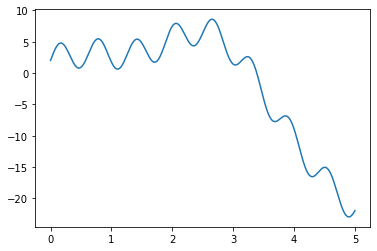

In [6]:
# plot the data
plt.plot(x,y)


## STEP 2: RESAMPLING DATA SETS

In [7]:
#TODO: split the data into xTrain, xTest, yTrain, yTest
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1,\
                                              random_state = 3,\
                                              shuffle = True)
#random_state the seed of the randomization fun is the same 
test_data_size = len(xTest)
train_data_size = len(xTrain)

if(debug == 1):
    print(test_data_size)
    print(train_data_size)

500
4500


### Split The Training Dataset Into 10 Different Training Datasets

In [8]:
# Use Kfolds to split the data into 10 folds
kf = KFold(n_splits=10, random_state=None, shuffle=False)
kf.get_n_splits(xTrain)
X_train_data_sets = list()
Y_train_data_sets = list()

for train_indicies , test_indicies in kf.split(xTrain):
    X_train_data_sets.append(xTrain[test_indicies])
    Y_train_data_sets.append(yTrain[test_indicies])
#start_index = 0
#train_data_sets_size = int(train_data_size/10)
#end_index = train_data_sets_size
#for i in range(10):
#    X_train_data_sets.append(xTrain[start_index:end_index])
#    Y_train_data_sets.append(yTrain[start_index:end_index])
#    start_index += train_data_sets_size
#    end_index += train_data_sets_size
    
if(debug == 1):
    print(len(X_train_data_sets),len(X_train_data_sets[0]))
    print(len(Y_train_data_sets),len(Y_train_data_sets[0]))

10 450
10 450


### Graphing Each Of The Training Datasets

plotting dataset number 1


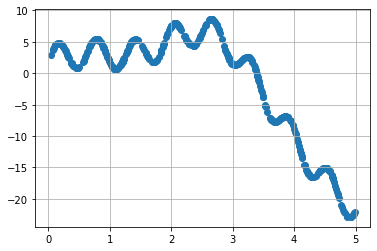

plotting dataset number 2


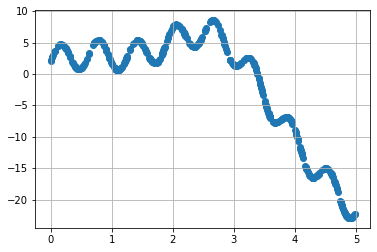

plotting dataset number 3


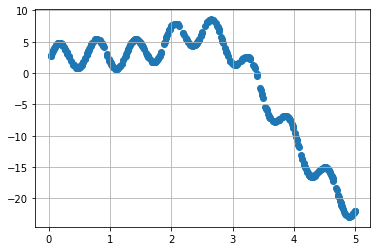

plotting dataset number 4


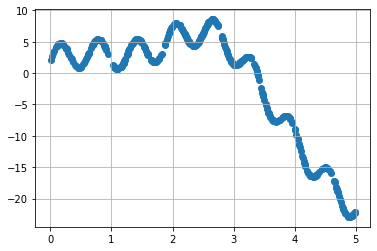

plotting dataset number 5


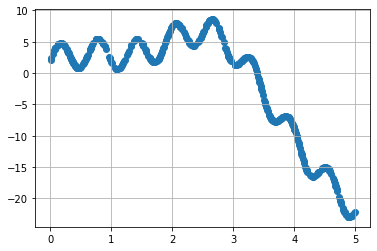

plotting dataset number 6


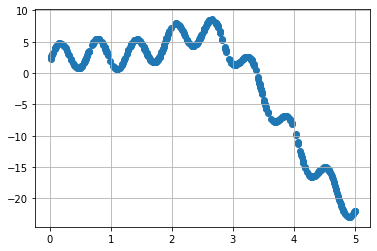

plotting dataset number 7


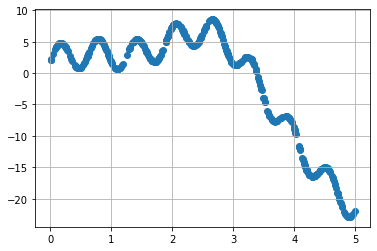

plotting dataset number 8


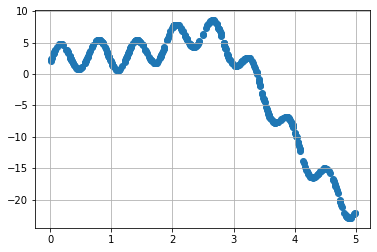

plotting dataset number 9


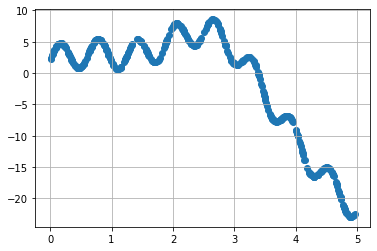

plotting dataset number 10


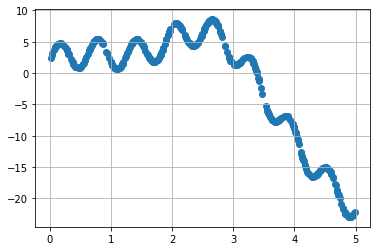

In [9]:
if(debug == 1):
    for i in range(10):
        # plot each of the 10 datasets.
        print("plotting dataset number {}".format(i+1))
        plt.scatter(X_train_data_sets[i],Y_train_data_sets[i])        
        #plt.plot()
        plt.grid()
        plt.show()


## STEP 3: TRAINING A MODEL

## Plotting A Graph Of The Trained Polynomial Regression Model

TRAINING SET  1


<Figure size 432x288 with 0 Axes>

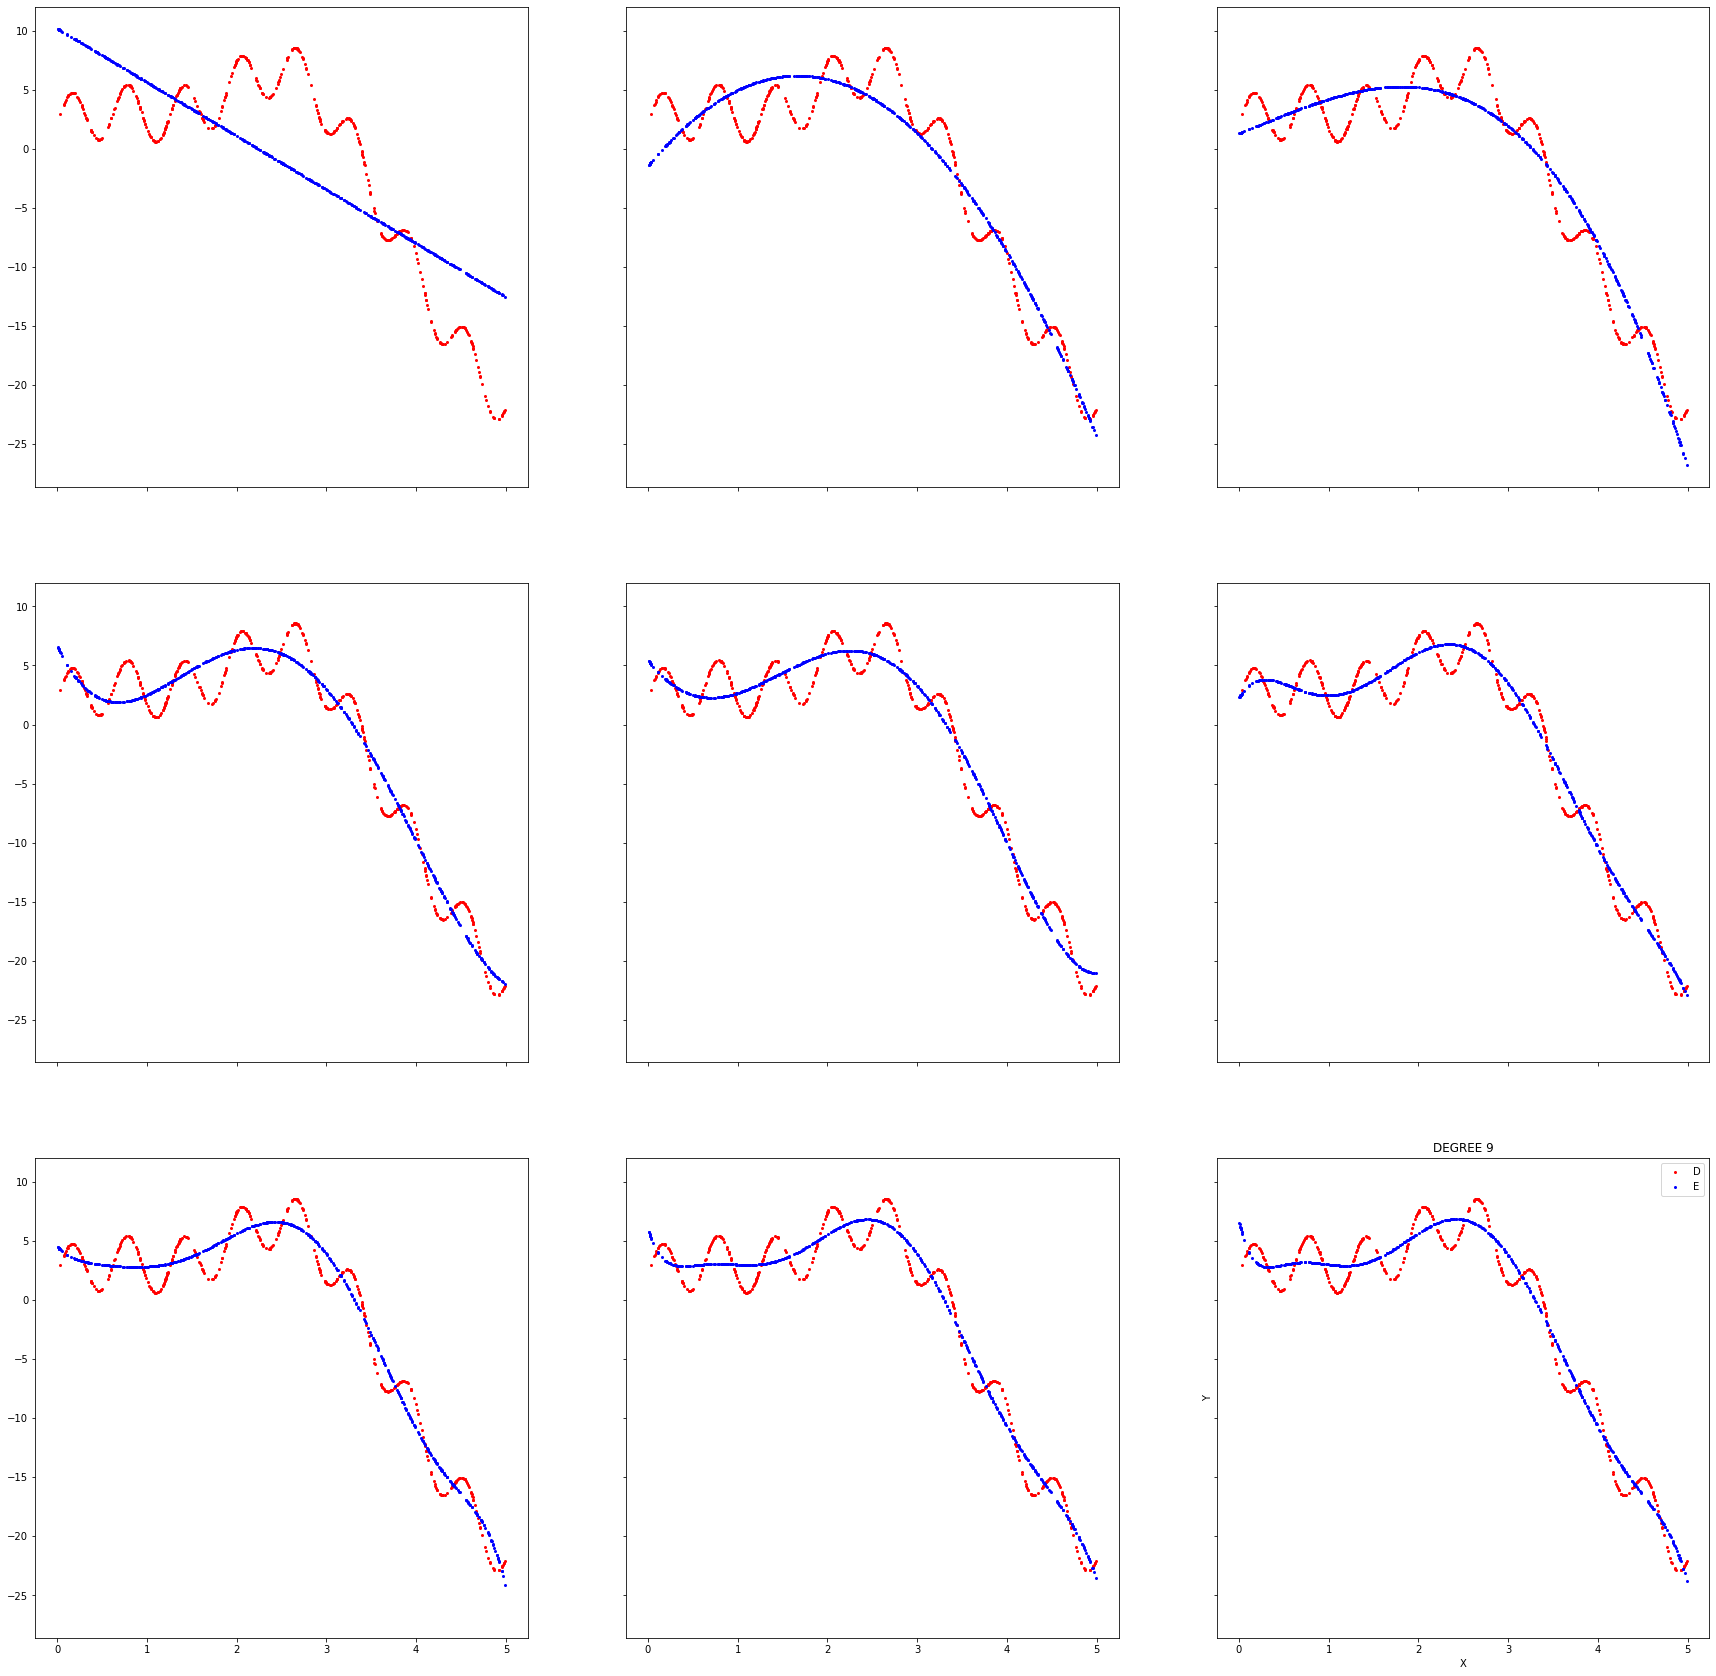

TRAINING SET  2


<Figure size 432x288 with 0 Axes>

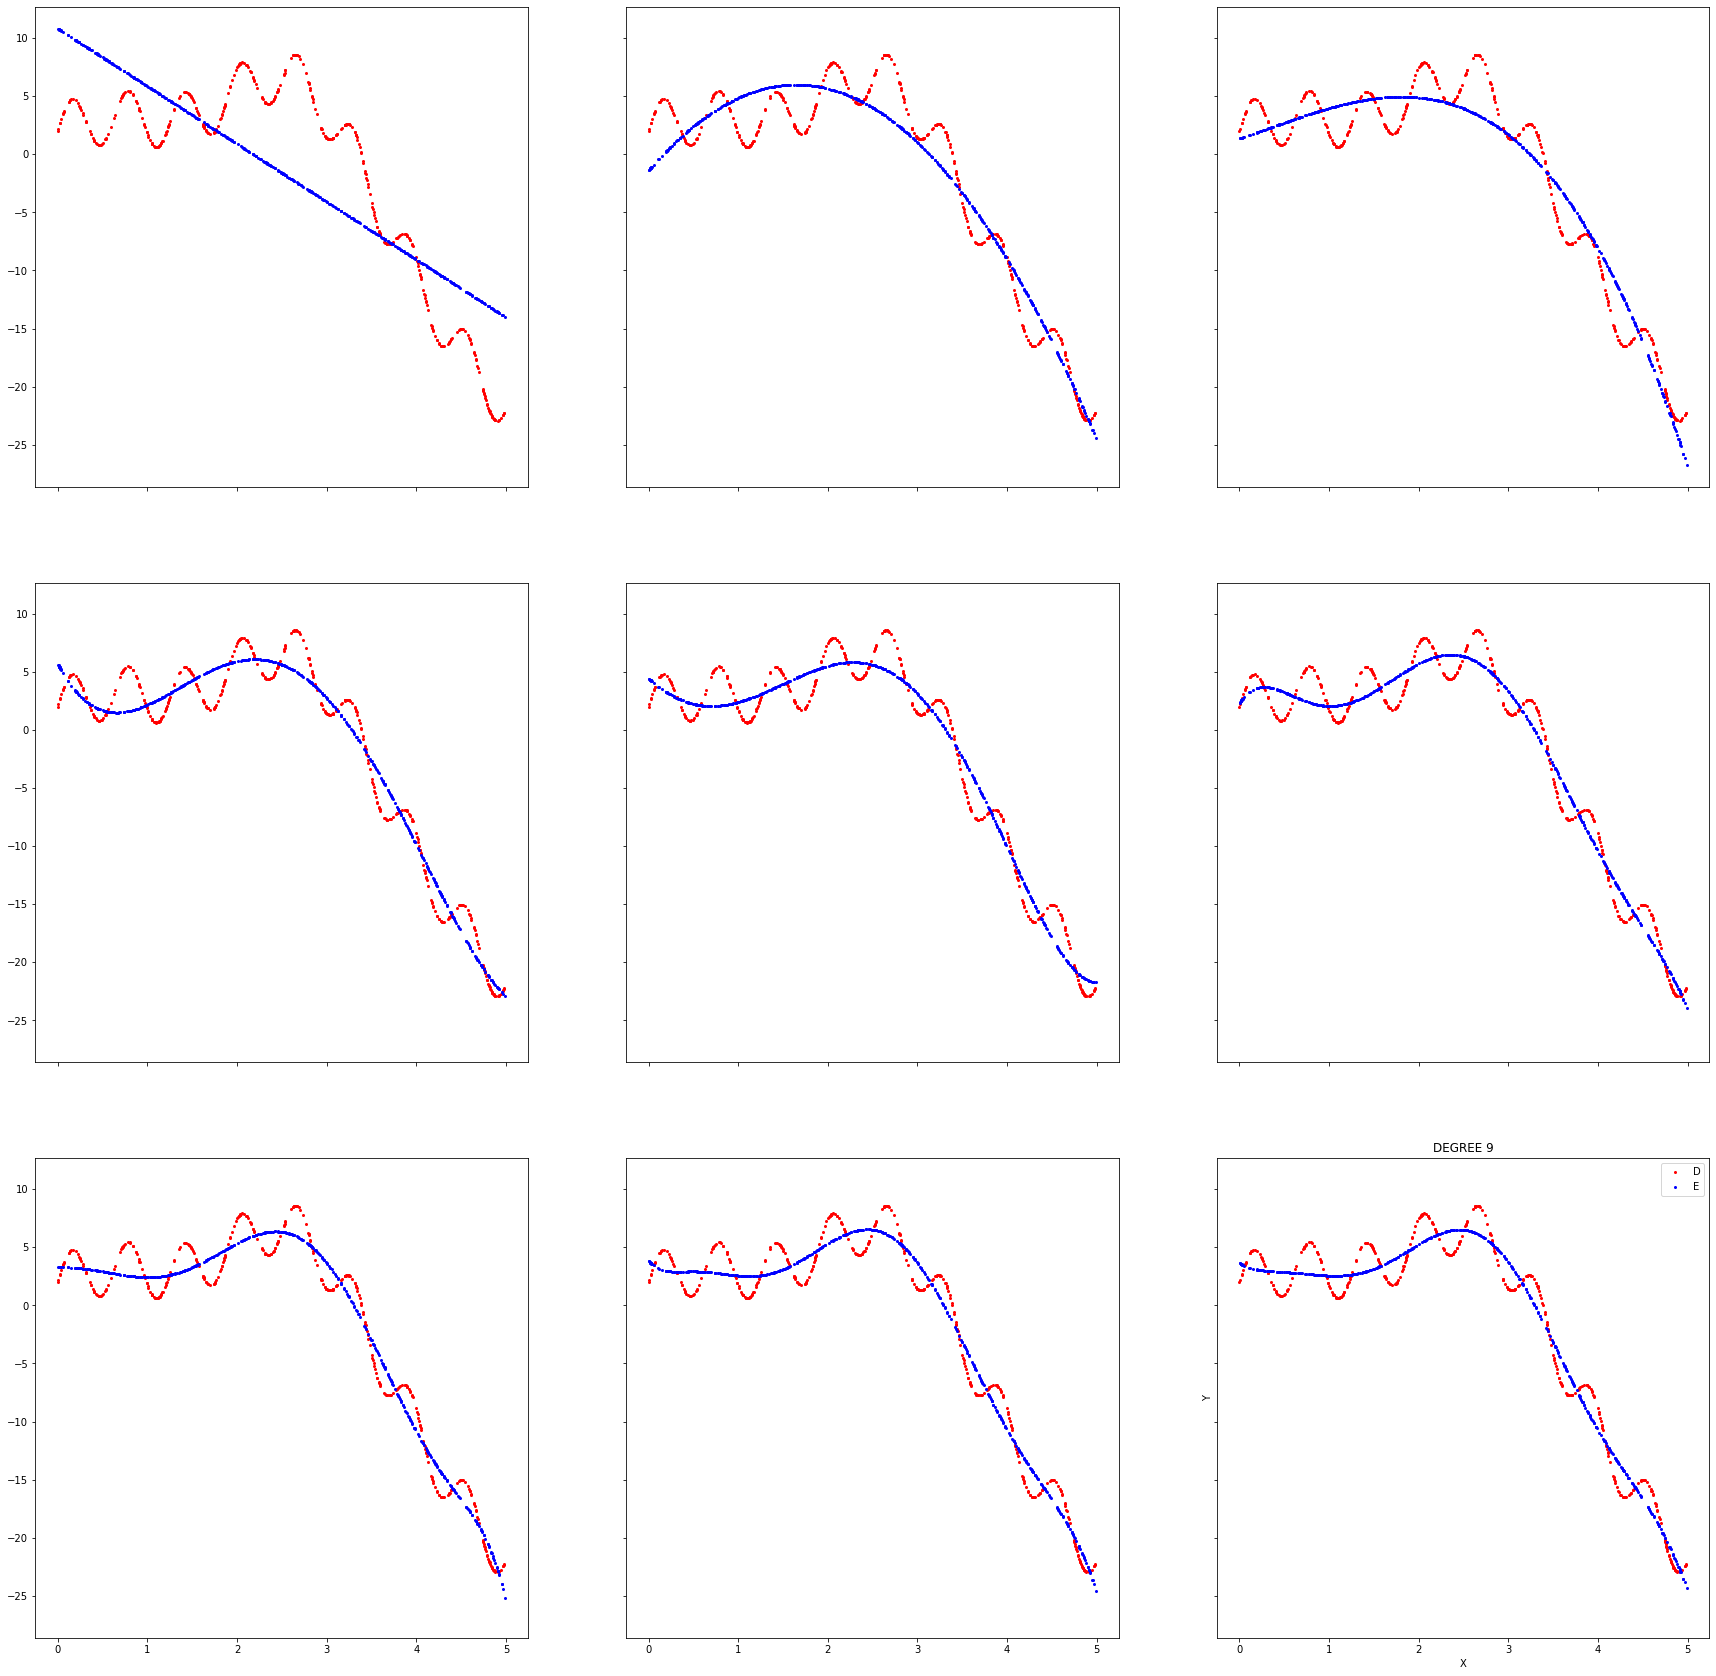

TRAINING SET  3


<Figure size 432x288 with 0 Axes>

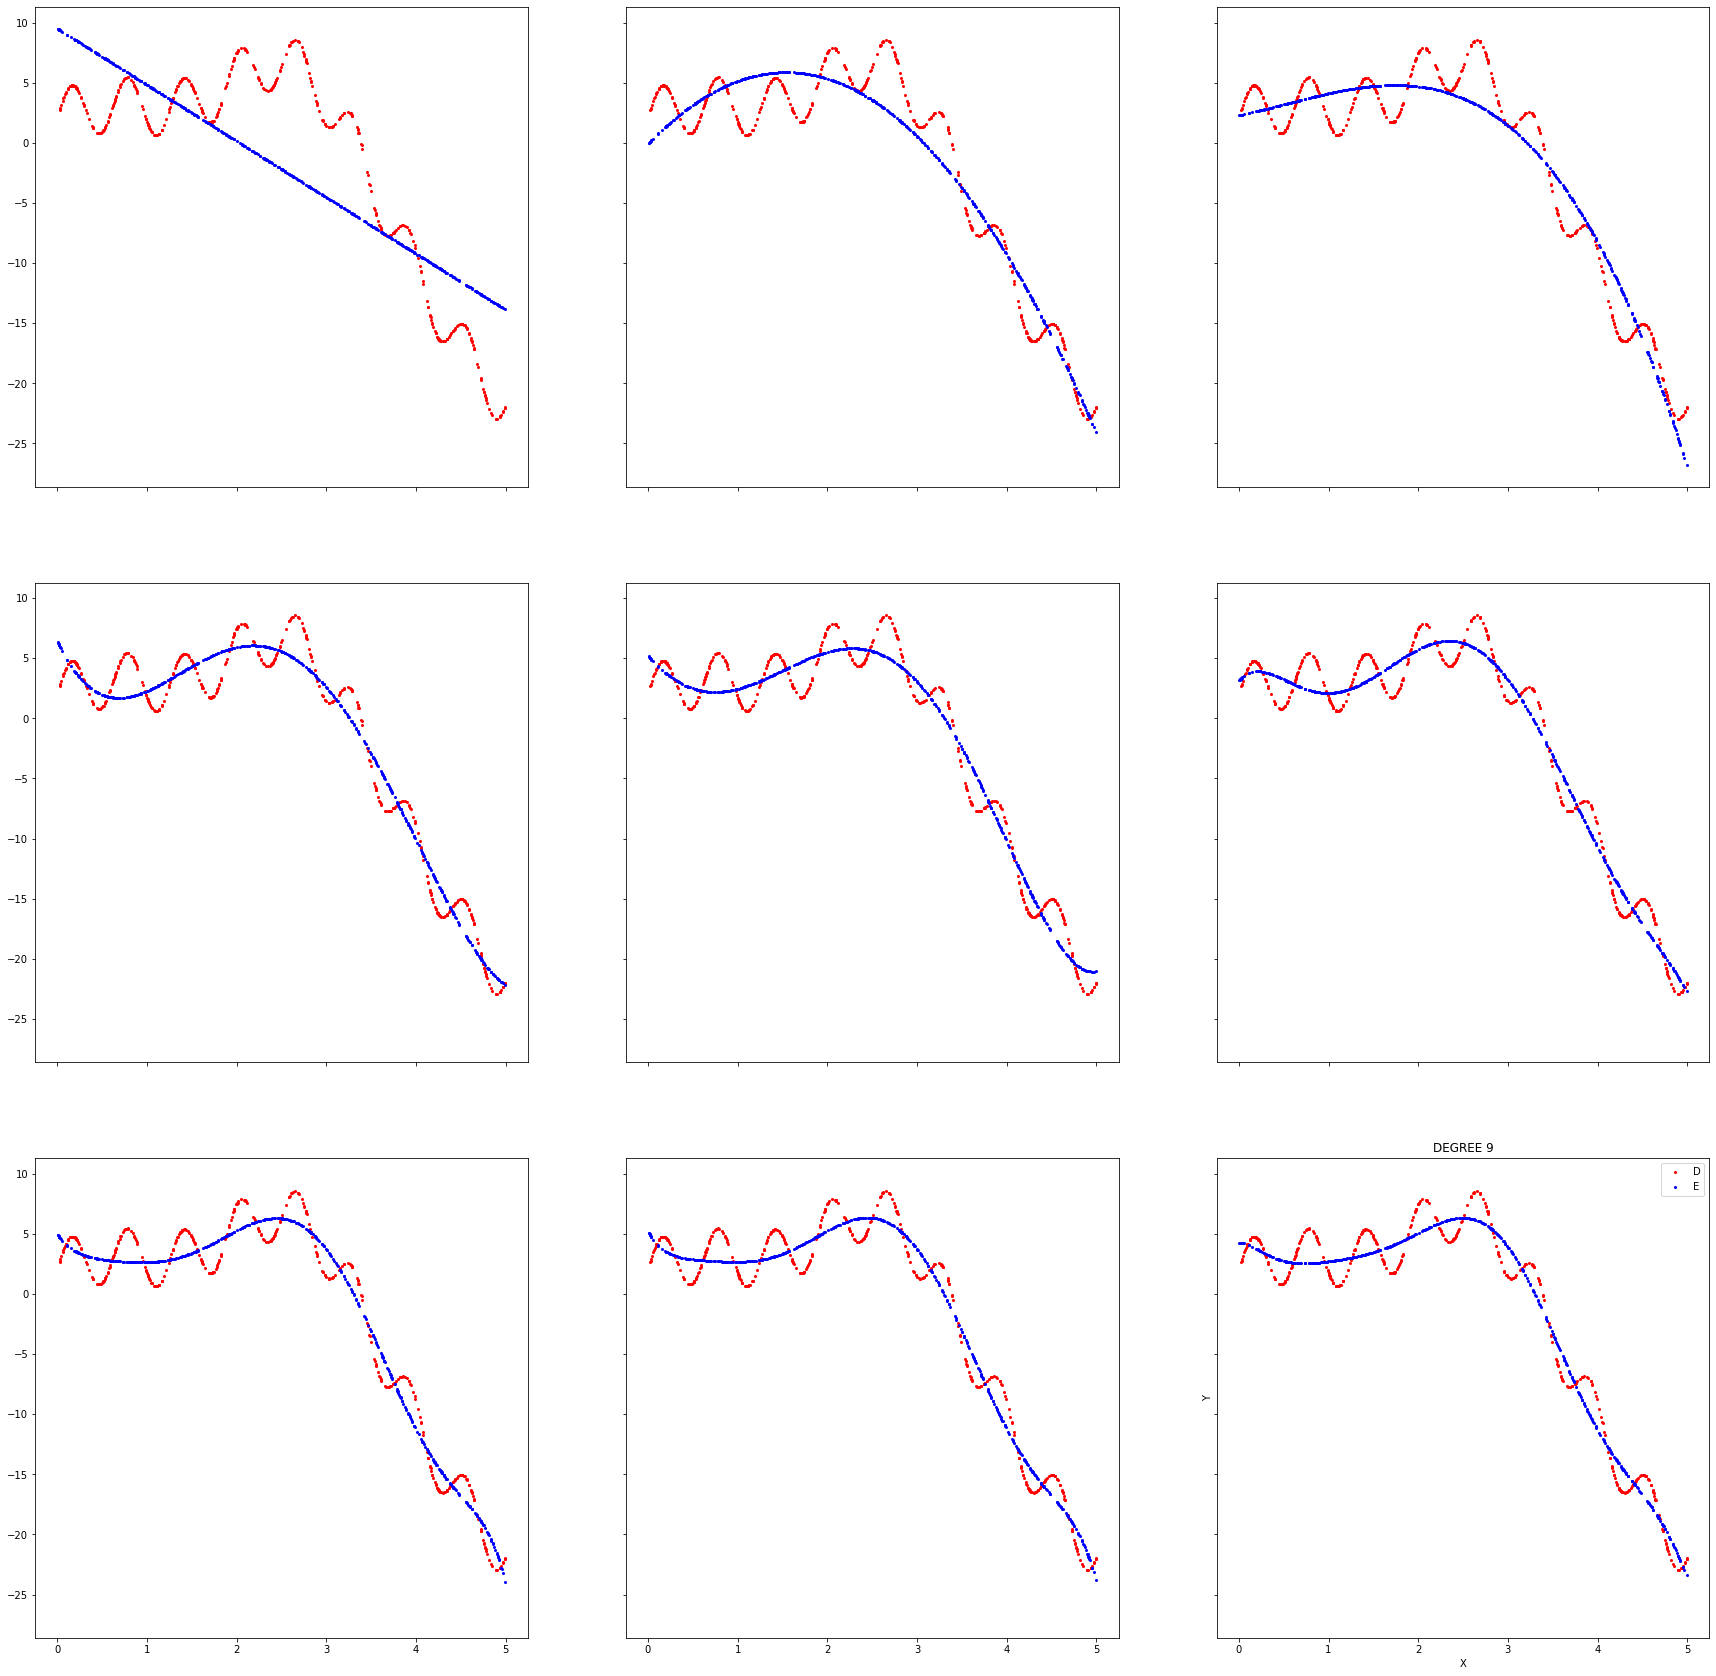

TRAINING SET  4


<Figure size 432x288 with 0 Axes>

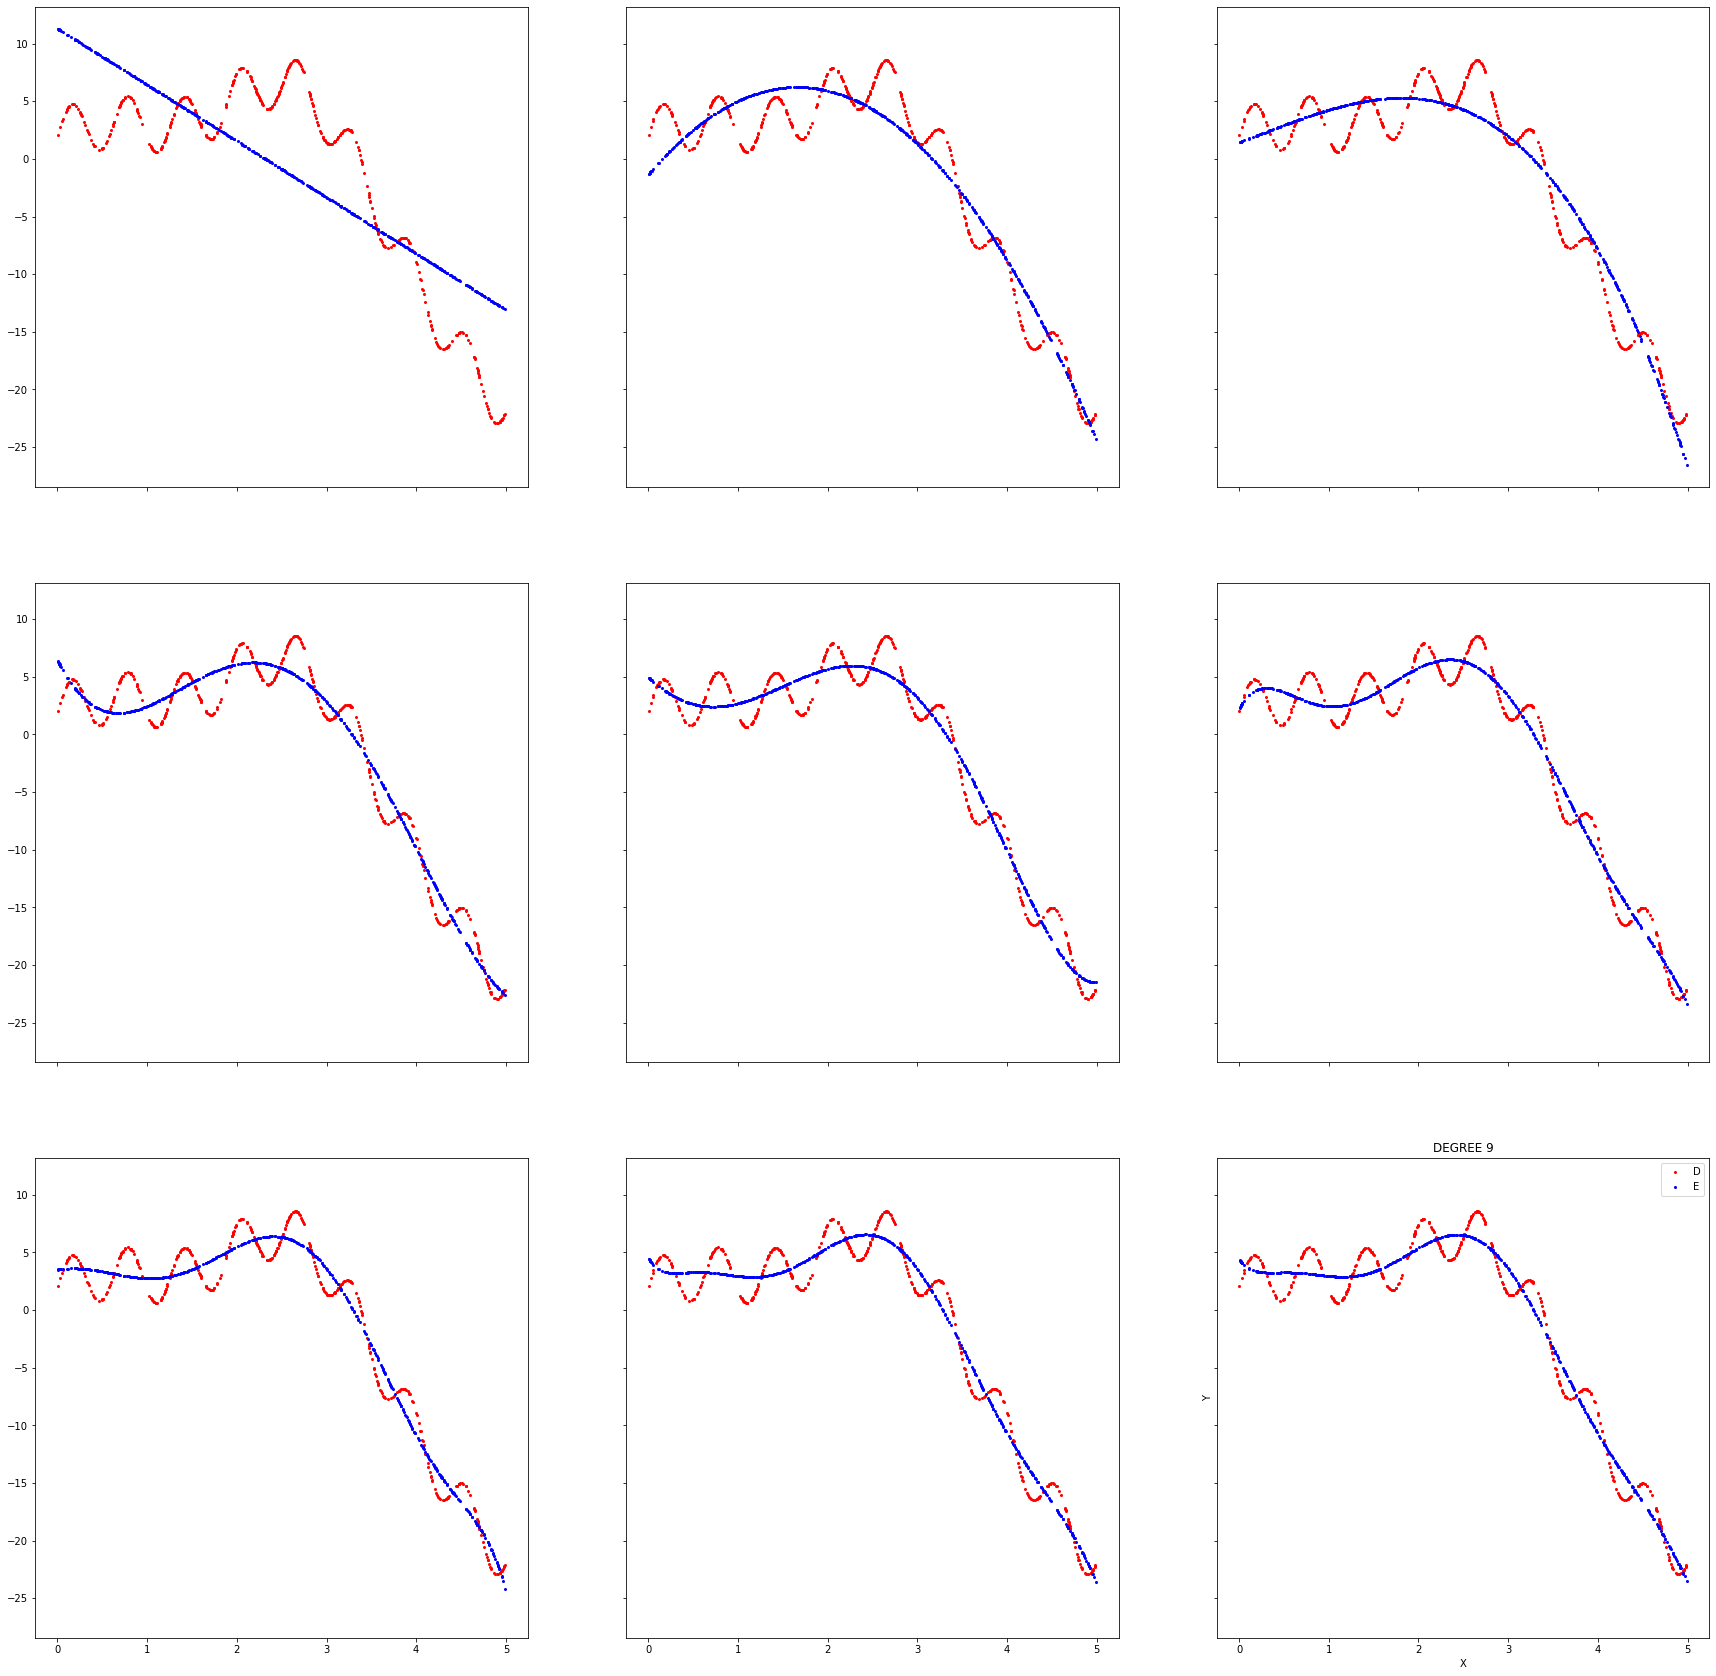

TRAINING SET  5


<Figure size 432x288 with 0 Axes>

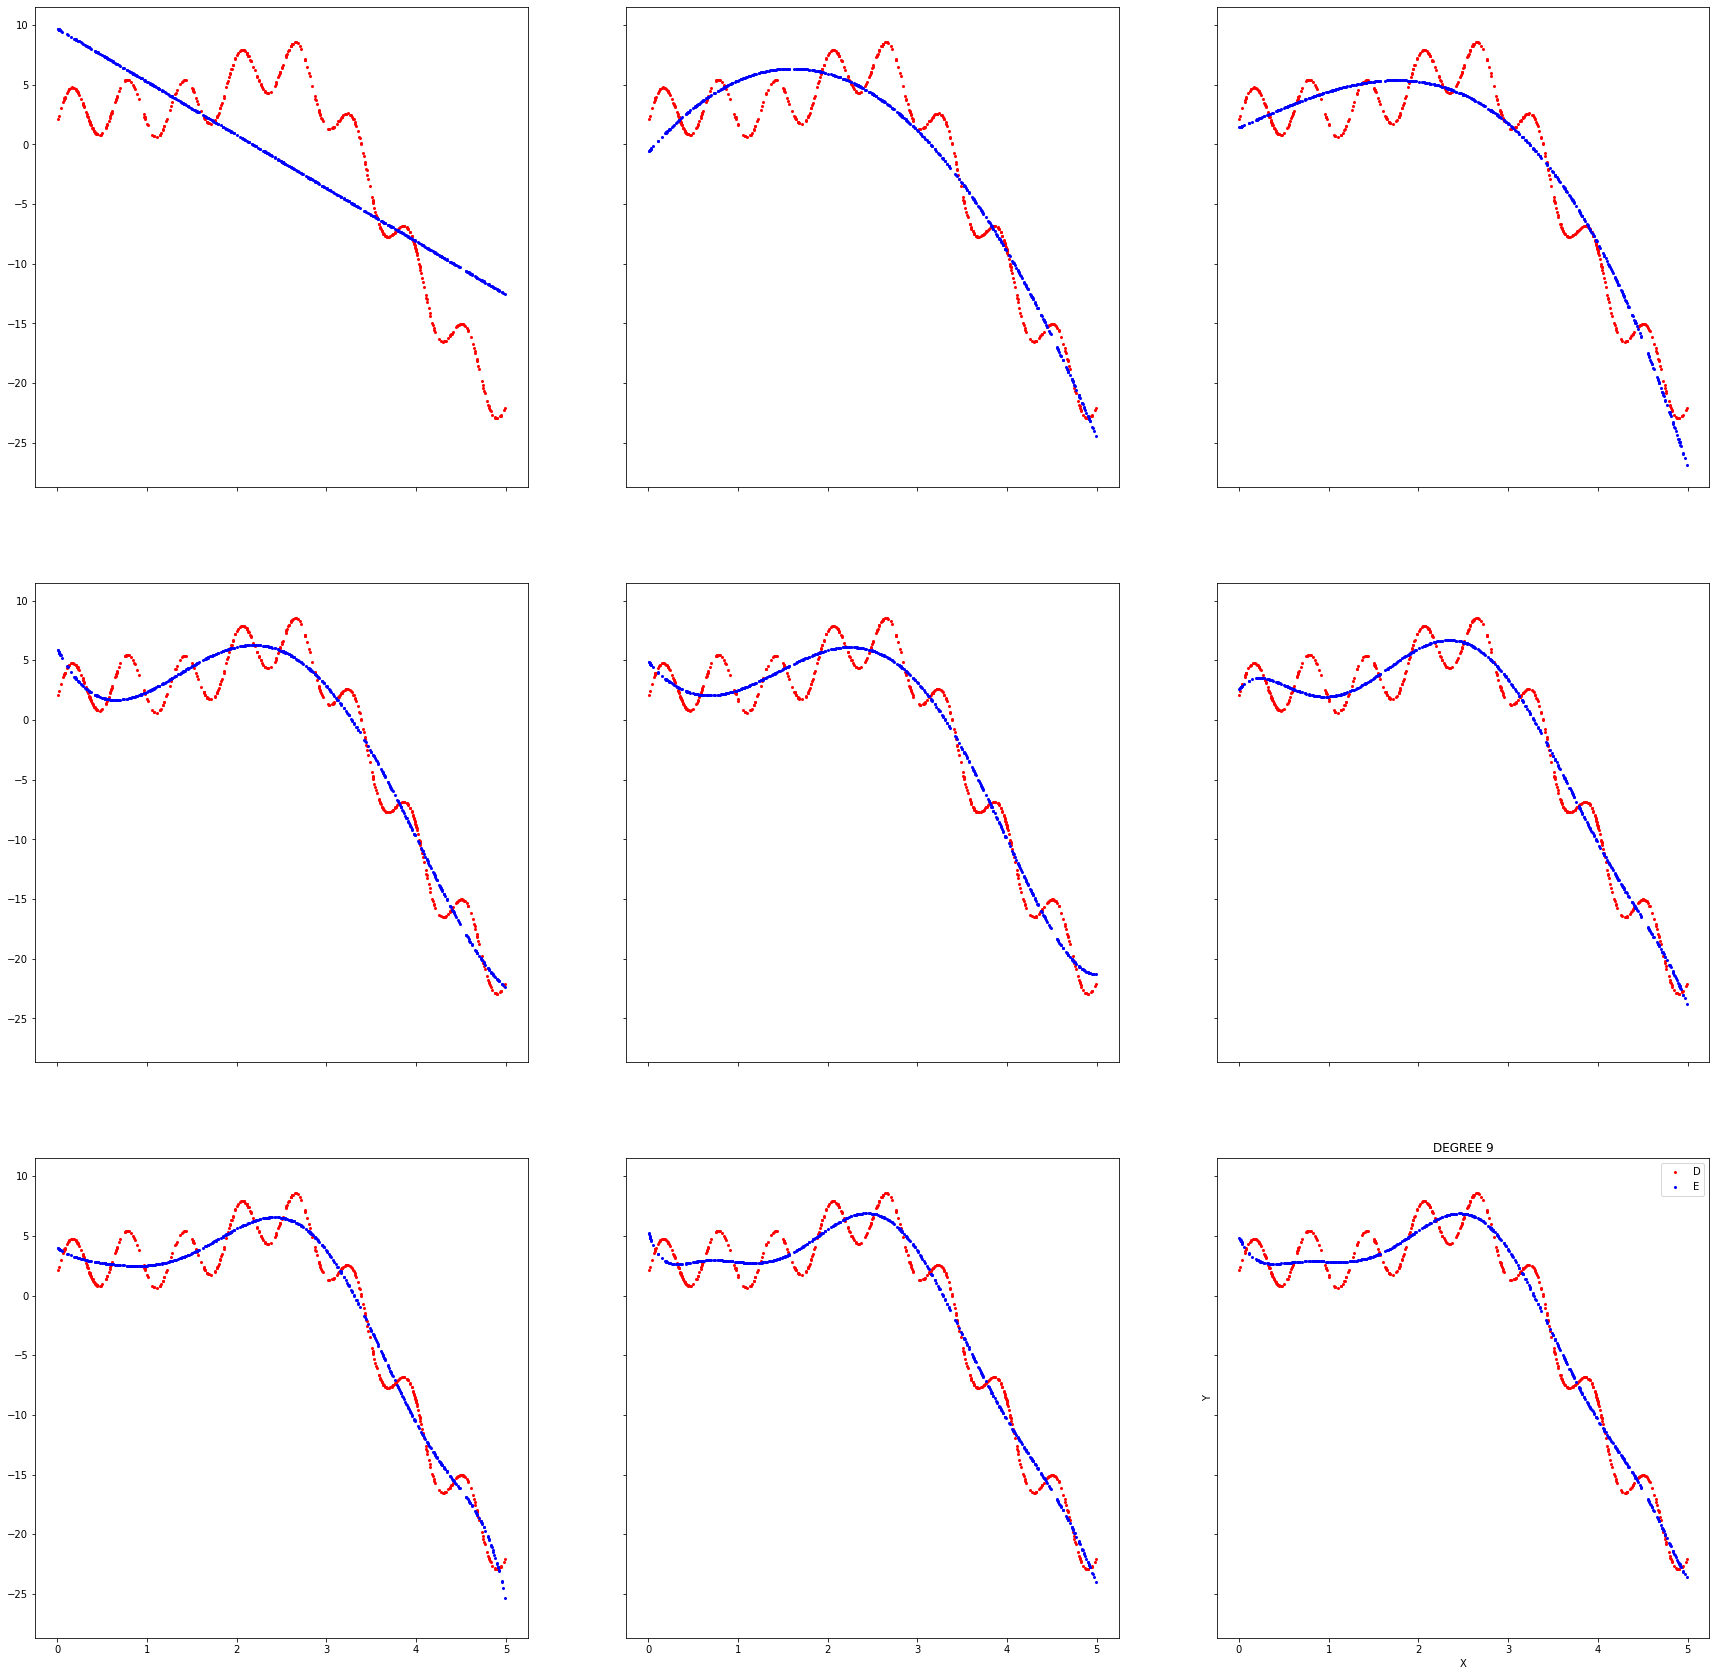

TRAINING SET  6


<Figure size 432x288 with 0 Axes>

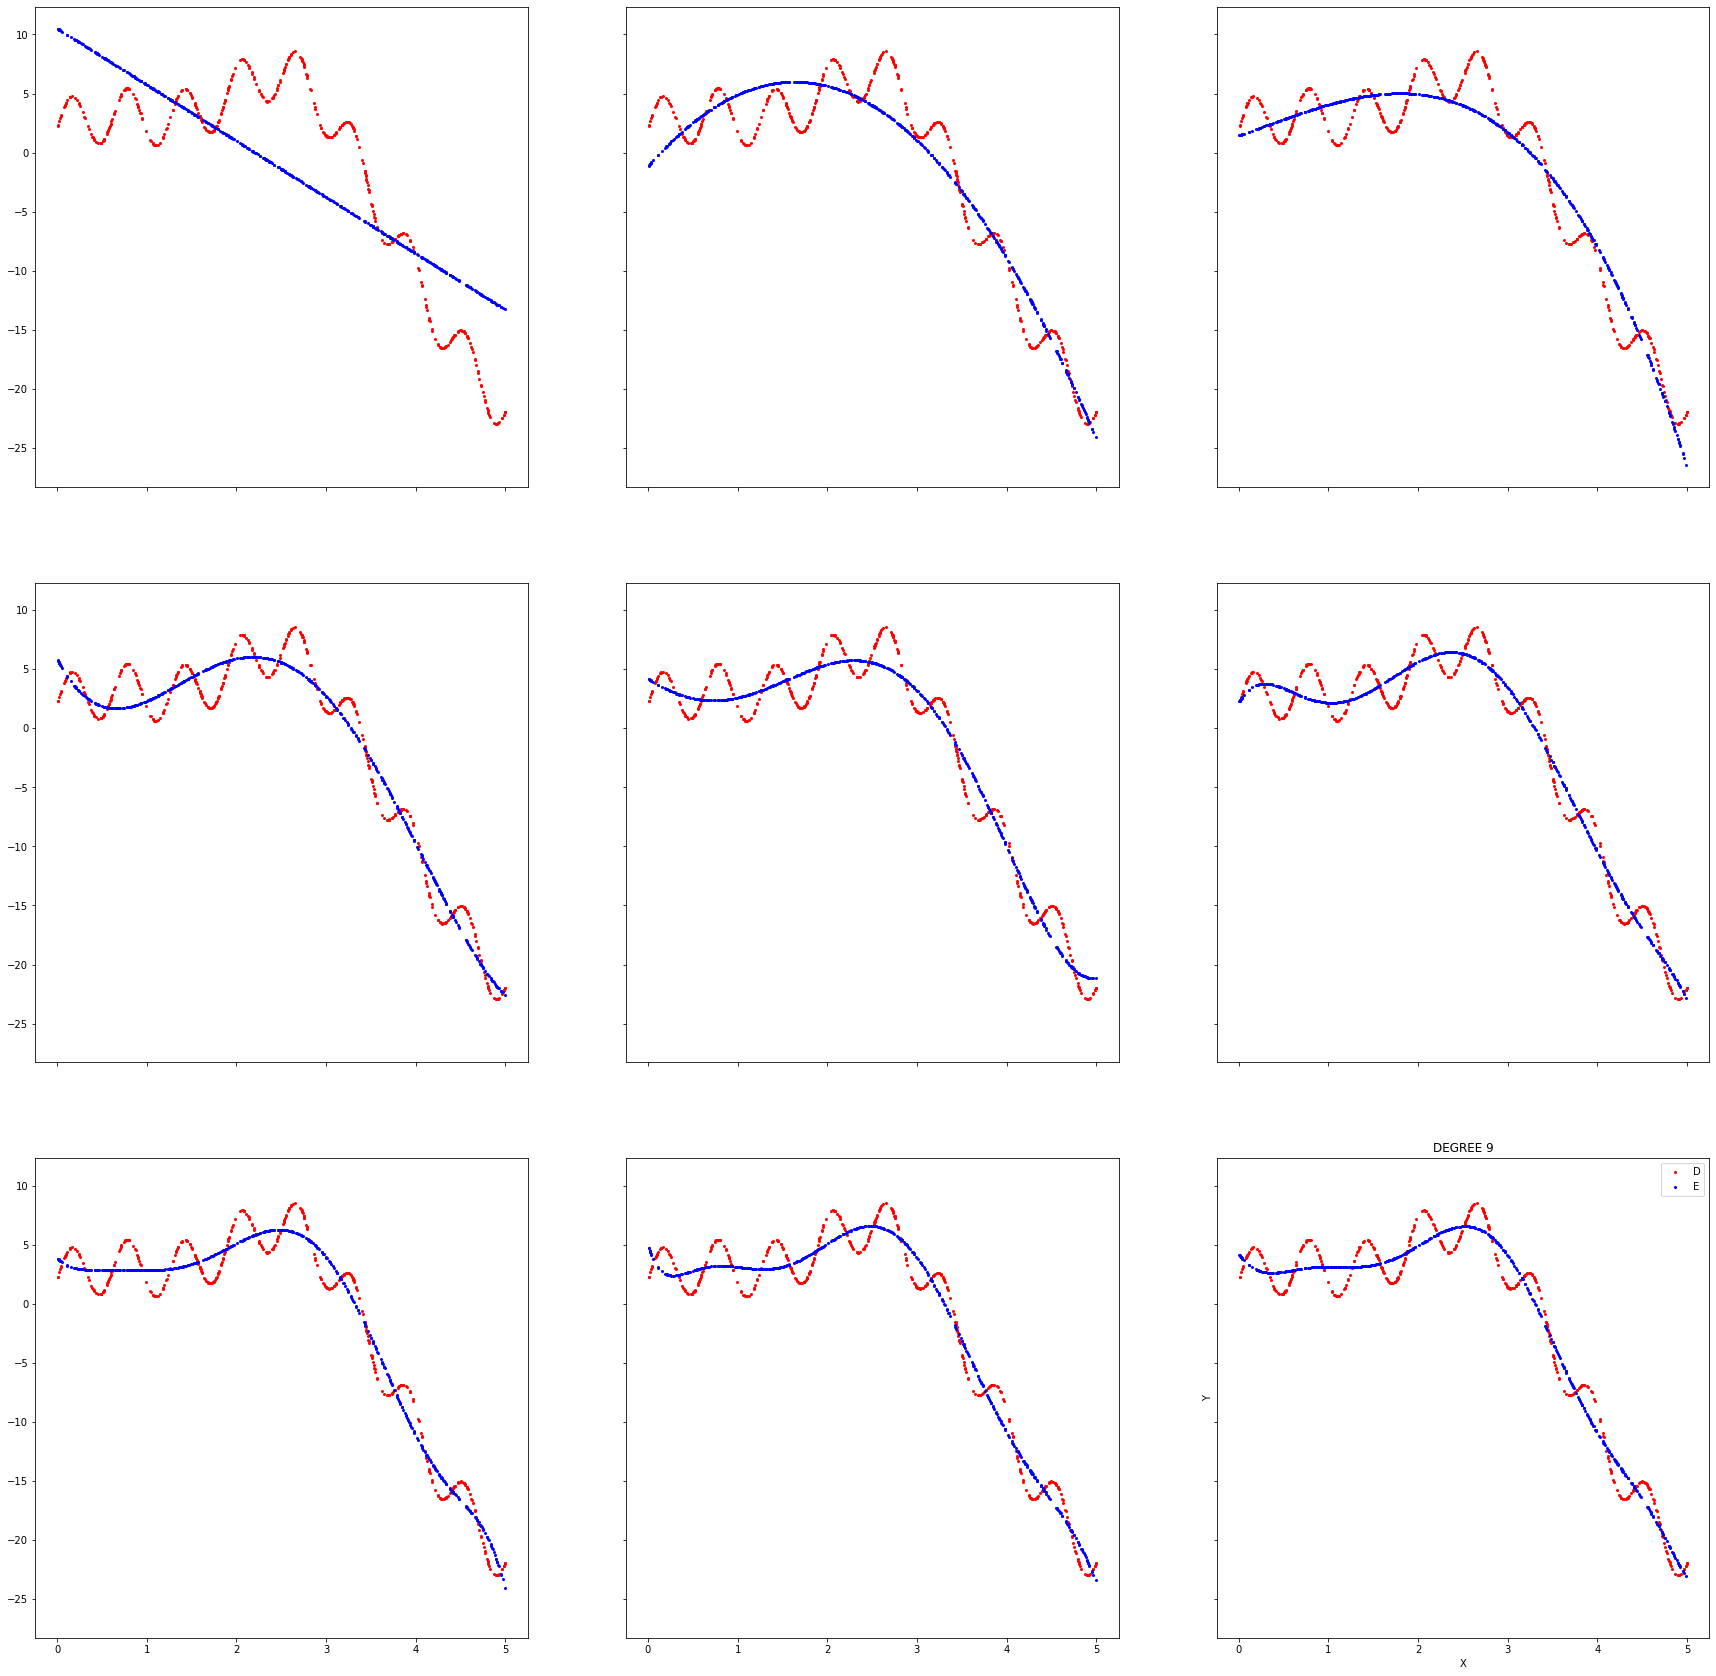

TRAINING SET  7


<Figure size 432x288 with 0 Axes>

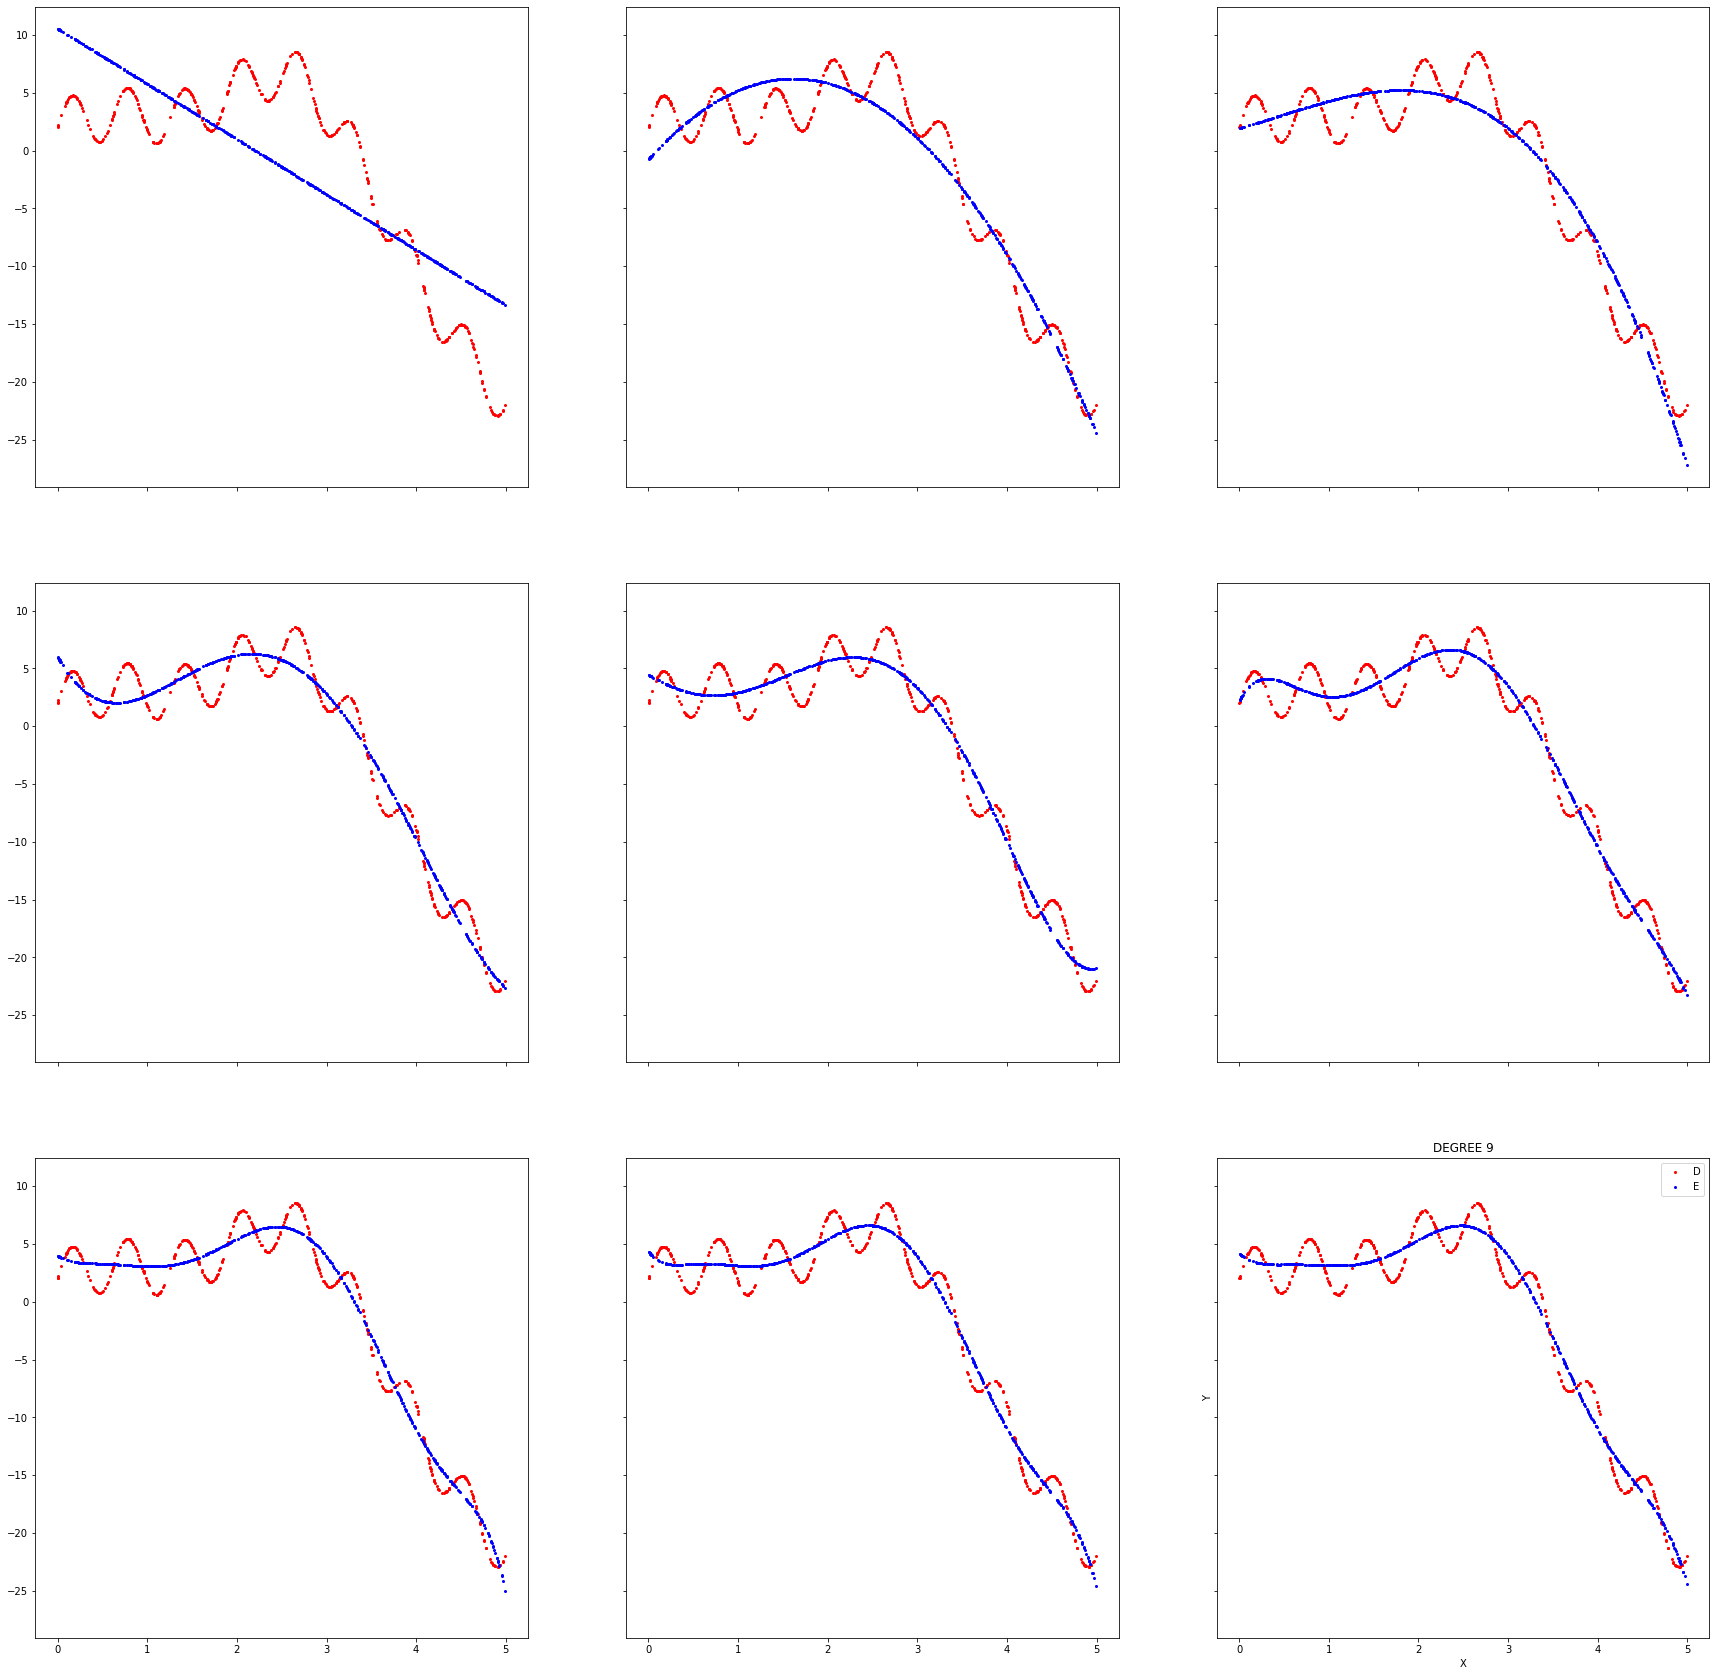

TRAINING SET  8


<Figure size 432x288 with 0 Axes>

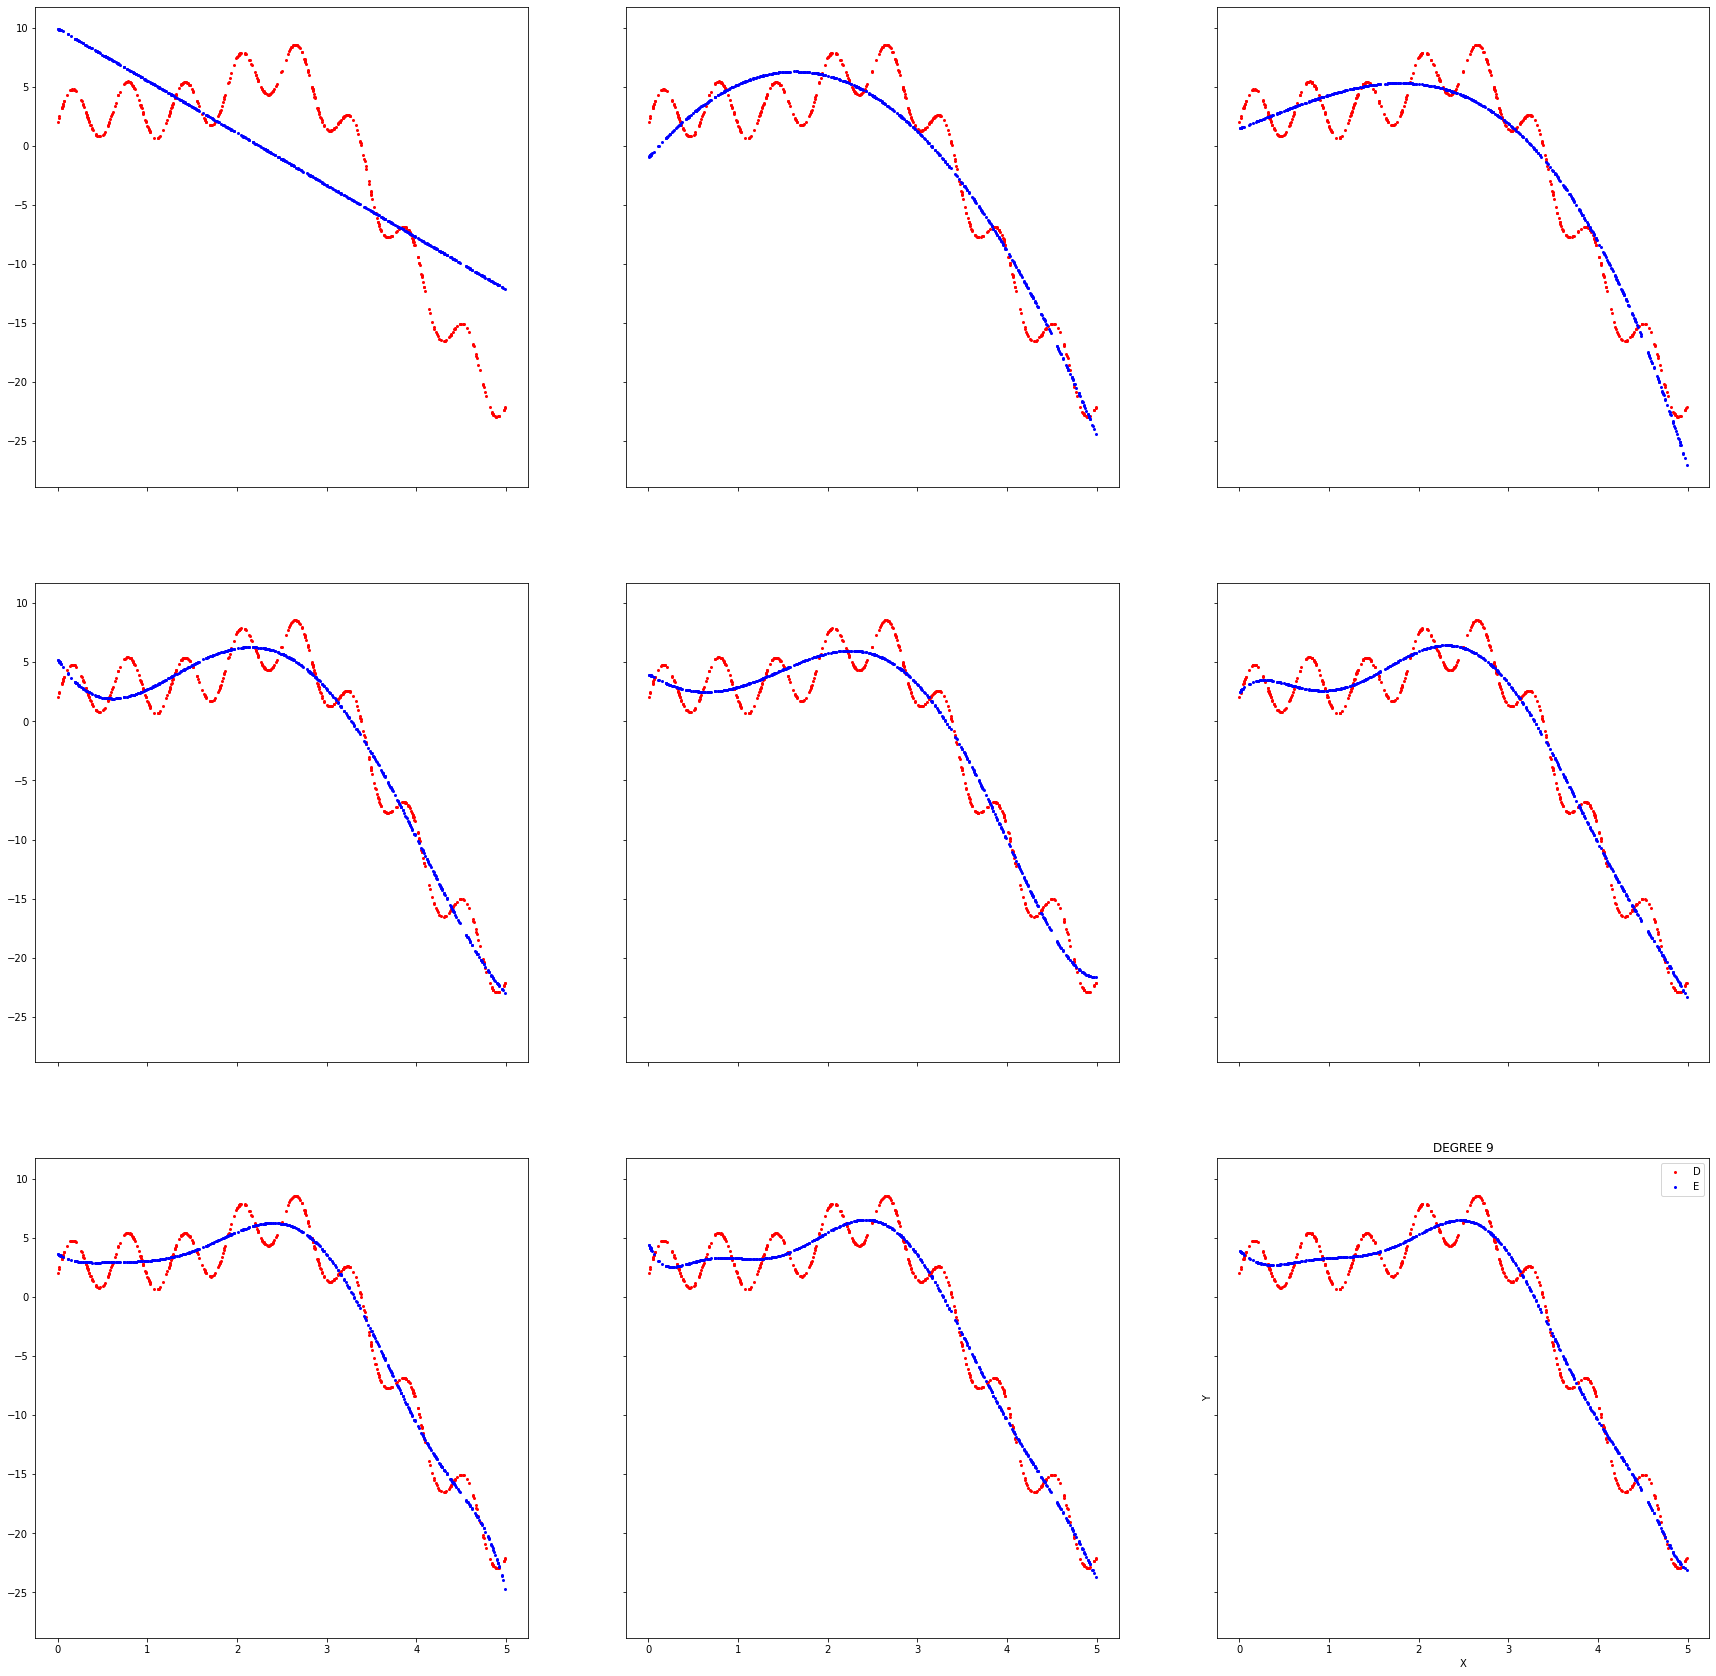

TRAINING SET  9


<Figure size 432x288 with 0 Axes>

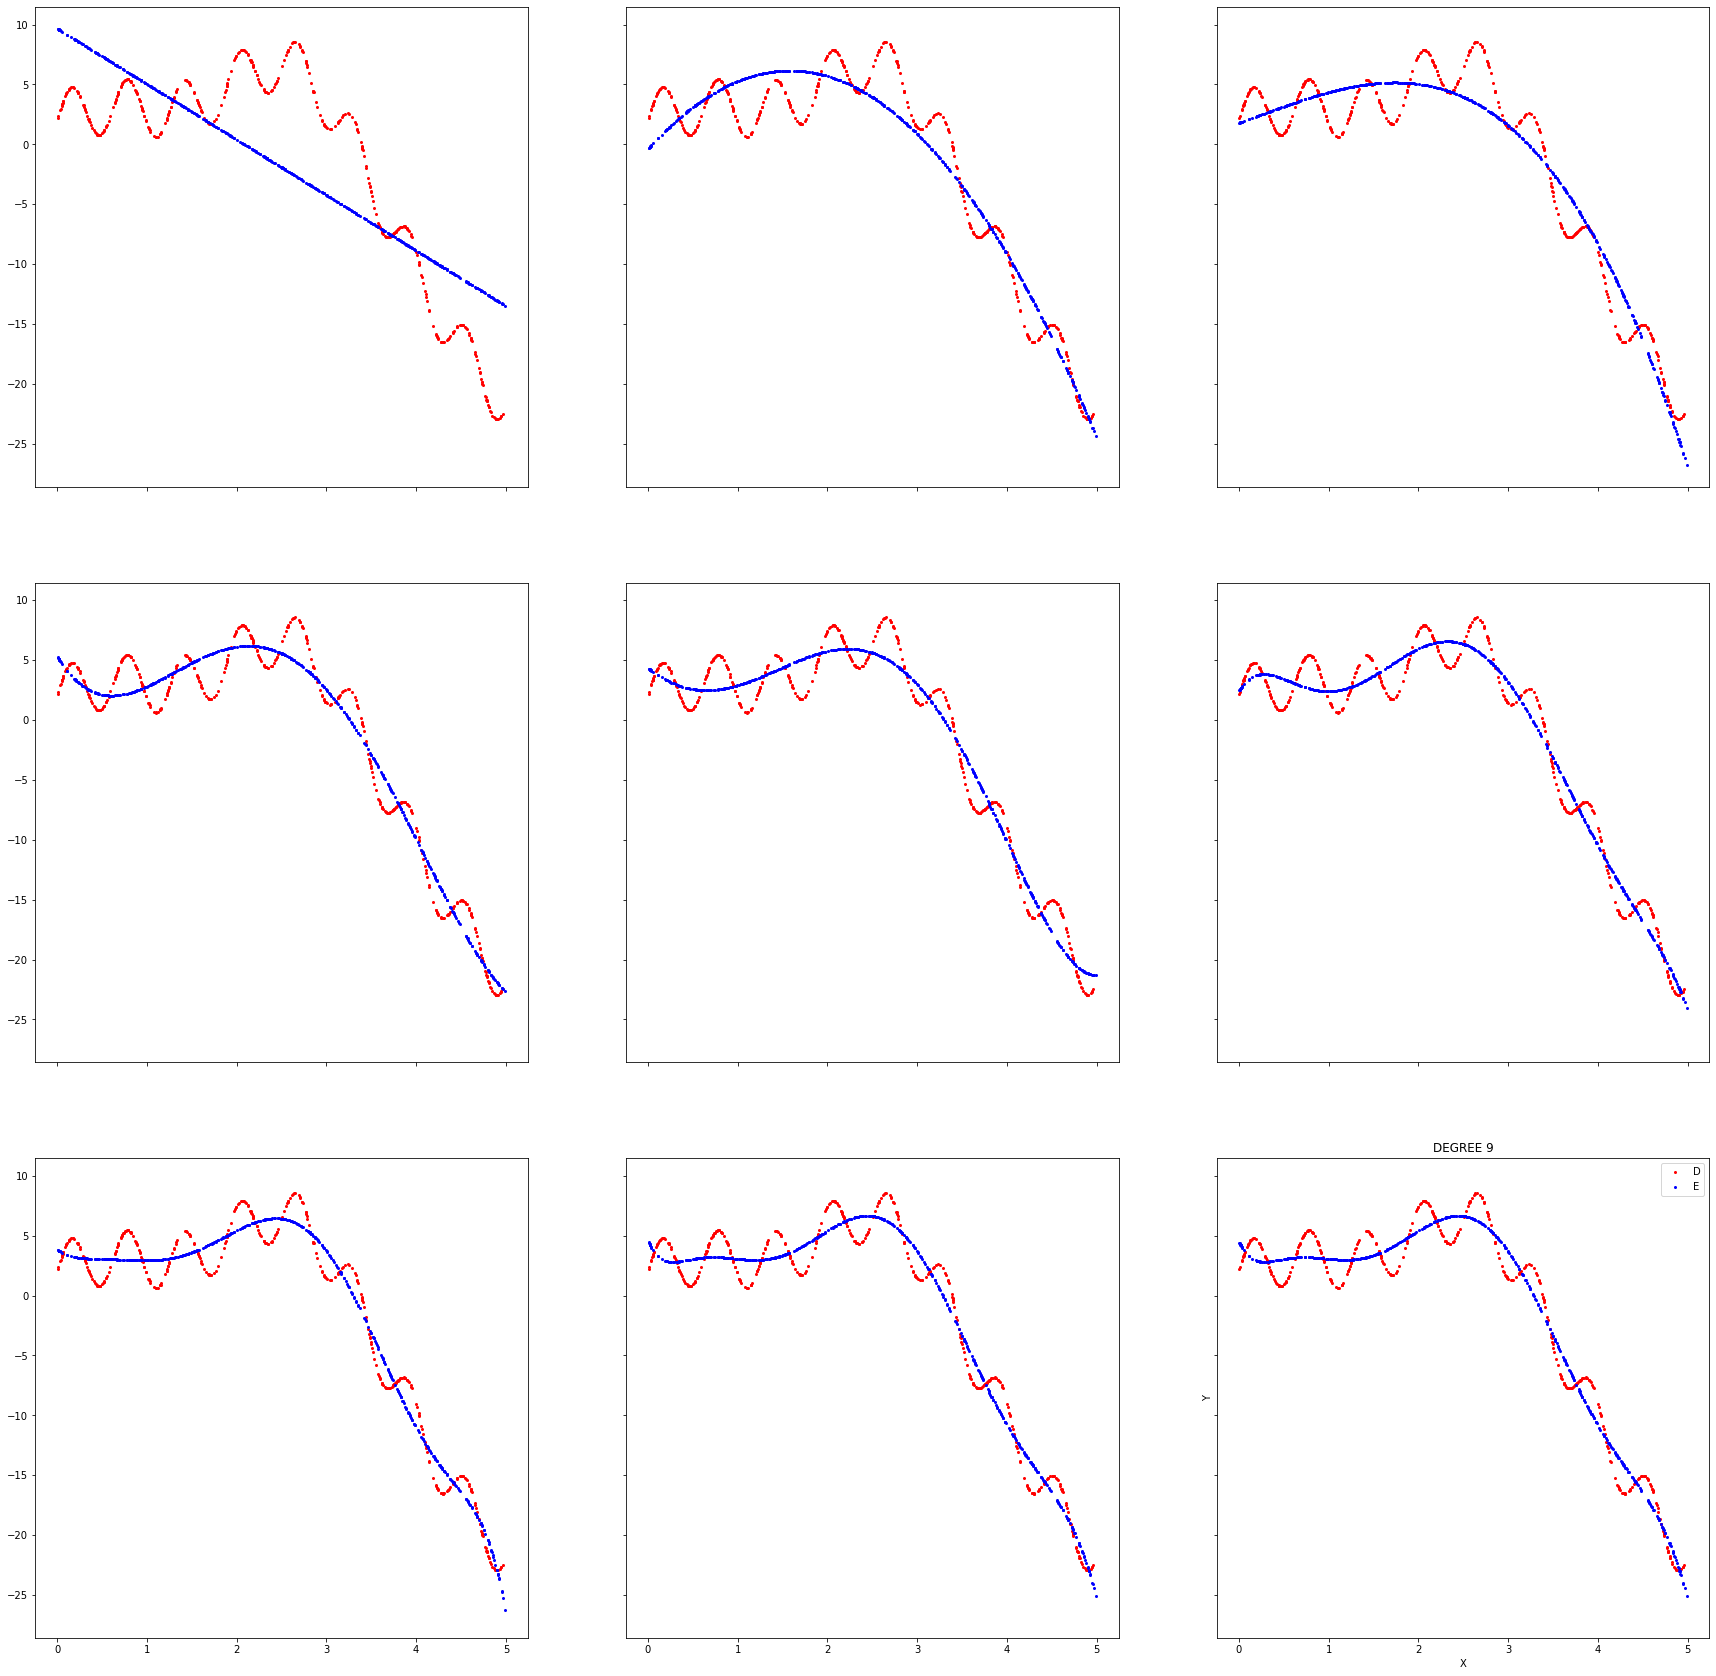

TRAINING SET  10


<Figure size 432x288 with 0 Axes>

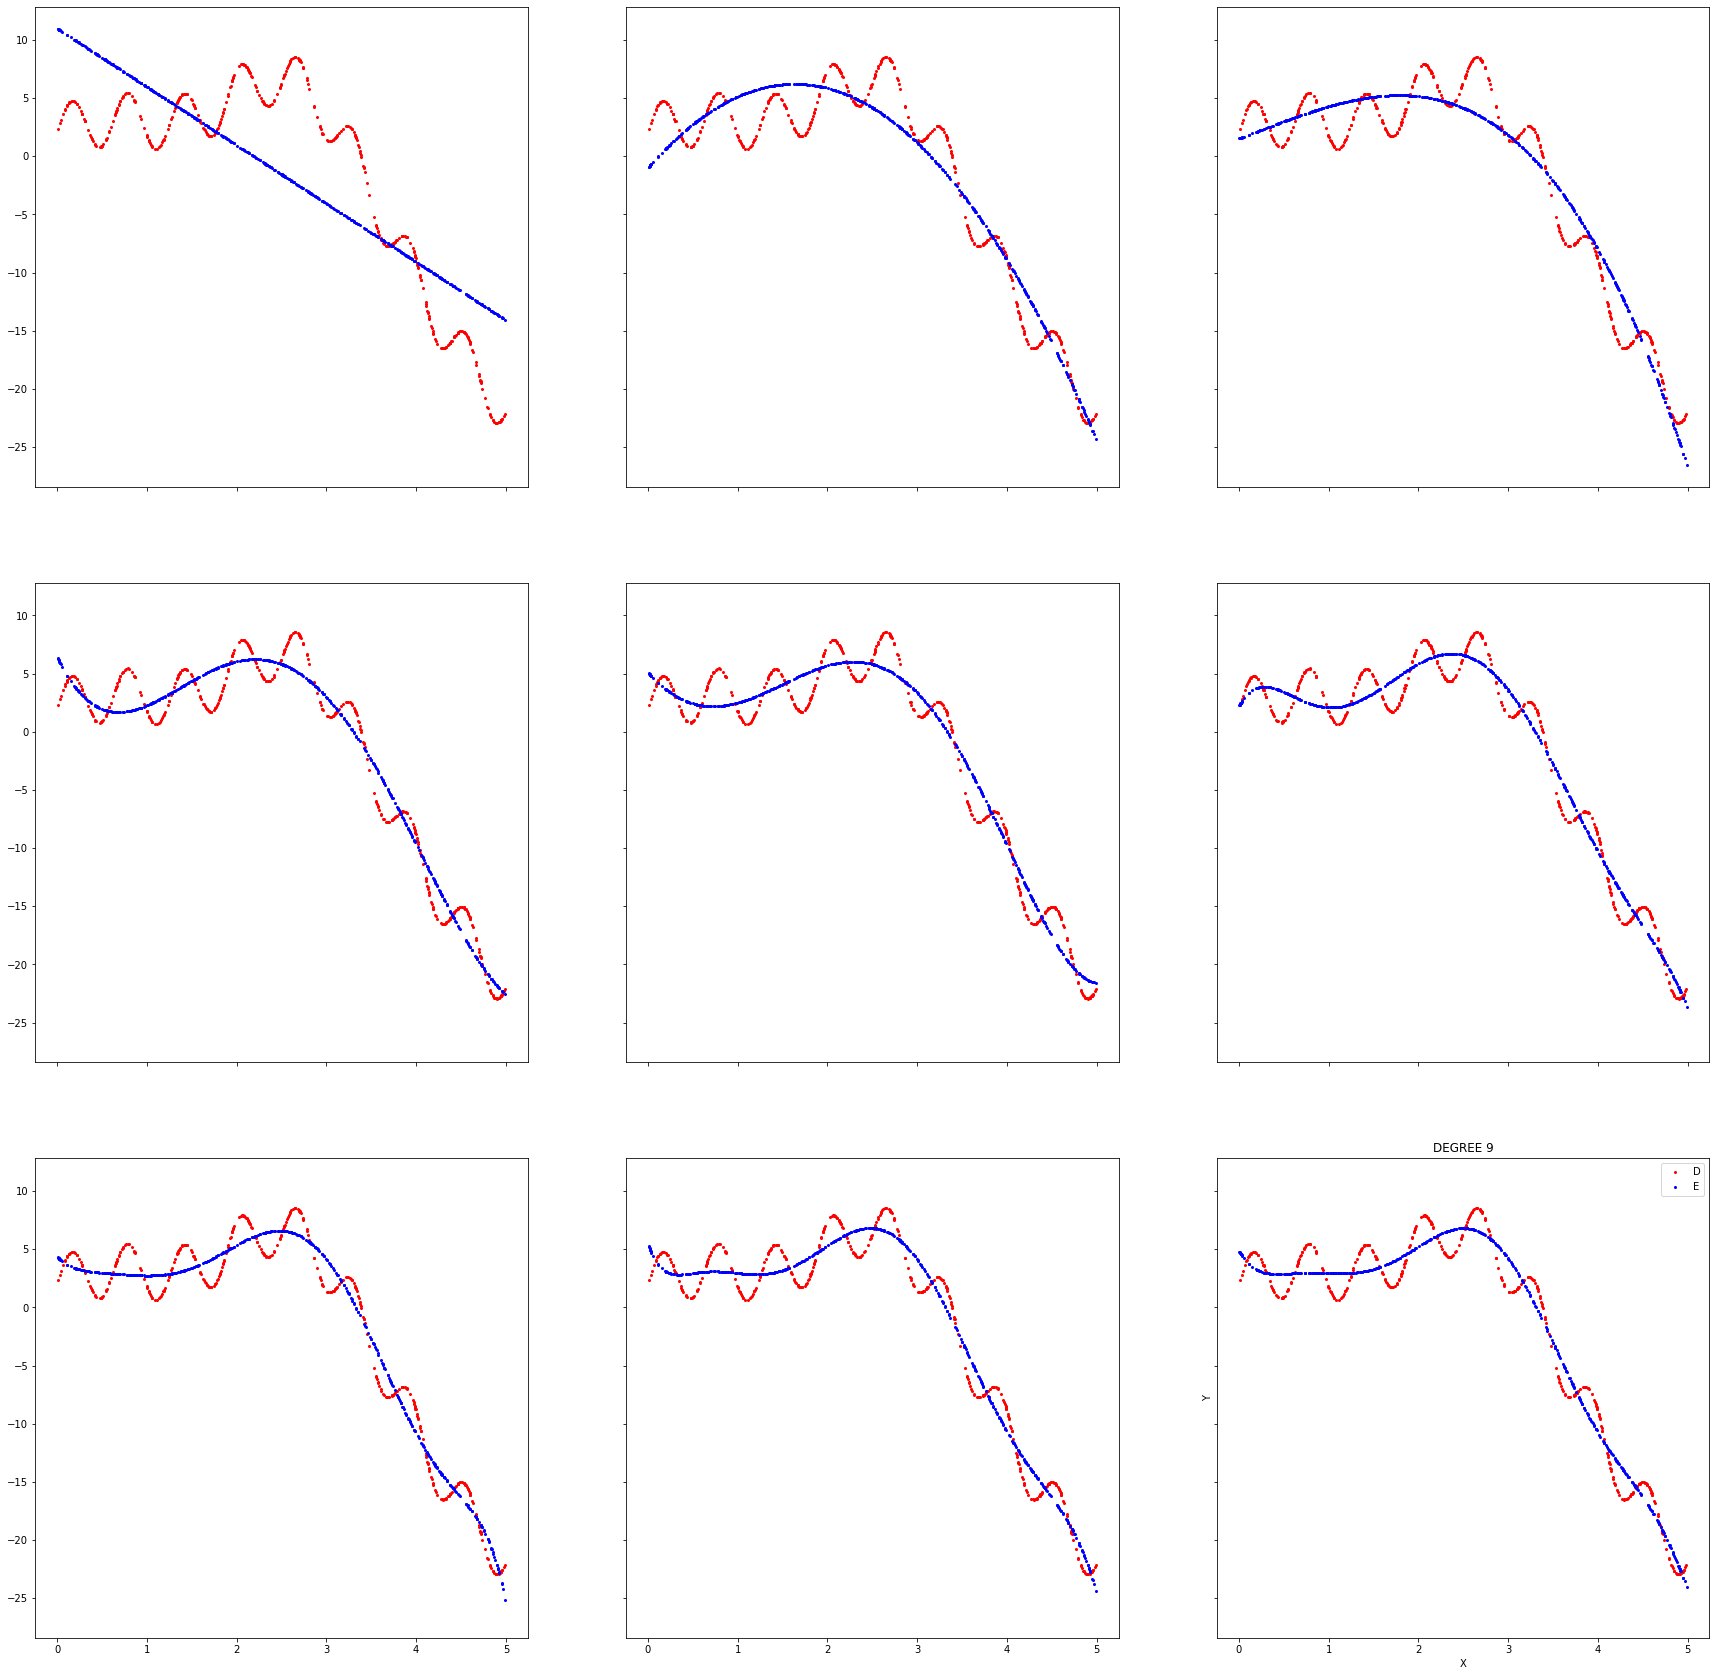

In [10]:
if(graphing == 1):
    for i in range(10): #loop over the datasets
        print("TRAINING SET ", i+1)
        f = plt.figure()
        f, axes = plt.subplots(nrows=3, ncols=3, sharex=True,
                               sharey=True, figsize=(30, 30))
        x = X_train_data_sets[i][:, numpy.newaxis]  # transposing it, our training x is the subset number i
        y = Y_train_data_sets[i]   # our labels for this training is the subset number i
        for degree in range(0, 9): #loop on every subset 9 times (for every model)
            axes[int(degree/3)][int(degree % 3)].plot(x, y, 'r.', markersize=4)
            
            #TODO: make PolynomialFeatures, fit them, make linear regression model, train it, 
            #      and finally infer using that model 
            poly_feat = PolynomialFeatures(degree = degree + 1) #function that takes the degree and return polynomial features
            features = poly_feat.fit_transform(x) # the function takes x and expand it to the polynomial eqn that was produced above-that is not training!
            # the above 2 lines were to create polynomial features out of x - current subset-
            poly_model = LinearRegression() #we create variable for linear regression - contains the linr regr model 
            poly_model.fit(features , y) #we fit -train- the model with the polynomial features that were created above
            
            # Predict on the test set 
            y_test_predict = poly_model.predict(poly_feat.fit_transform(xTest[:,numpy.newaxis])) # We have to also make the xtest of polynomial features of the same order
            
            
            axes[int(degree/3)][int(degree % 3)].plot(xTest[:,
                                                            numpy.newaxis], y_test_predict, 'b.', markersize=4)
            plt.title("DEGREE "+str(degree+1))
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.legend("DEGREE "+str(degree+1))
        plt.show()
        # For each data set we plot the predicted values of each model -blue- along with the actual data set -red-

# STEP 4: CALCULATE THE BIAS AND VARIANCE OF THE MODEL

# Get the list of all the predicted values

In [11]:
'''
First we get the list of all the y predicted values for all the models and for all the degrees separately in a 2-D array.
Here, for each model of each degree, we get the predicted y values for the given test datasets.
The values are stored as follows: y[train_data_set_no][degree]
'''
y_predicted = []
for i in range(10):
    x = X_train_data_sets[i][:, numpy.newaxis]  # transposing it
    y = Y_train_data_sets[i]
    temp = []
    for degree in range(0, 9):
        poly_features = PolynomialFeatures(degree = degree + 1)
        X_train_poly = poly_features.fit_transform(x)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly,y)
        y_test_predict = poly_model.predict(poly_features.fit_transform(xTest[:, numpy.newaxis]))
        temp.append(y_test_predict)
        #TODO: make PolynomialFeatures, fit them, make linear regression model, train it, 
        #      and finally infer using that model 
    y_predicted.append(temp)

# Function for calculating the bias and the variance

In [12]:
'''
Then we calculate the bias and variance as follows:
- For a given degree we append the values of the y_predicted for each model to a list
- Convert this list to a numpy array y_predicted_part
- Calculate the bias of this list by subtracting the mean of the model from the testing dataset
- Bias corresponding to the models of a given degree is the mean of this list
- Similarly calculate the variance of this list
- Variance corresponding to the models of a given degree is the mean of this list
'''


def find_bias_variance(order):
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][order]) #extract the predicted values -500- of a certain order from all datasets
    y_predicted_part = numpy.asarray(y_predicted_part)
    #TODO: Find the bias and the variance
    #print(len(y_predicted_part))
    bias = numpy.mean(numpy.abs(y_predicted_part - yTest), axis = 0)
    #print(len(numpy.abs(y_predicted_part - yTest)))
    #print(len(bias))
    variance = numpy.var(y_predicted_part, axis = 0)
    return(numpy.mean(bias), numpy.mean(variance))


# Then we call the function as follows, in order to populate the lists, bias and variance.

In [13]:
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)


Bias: [4.867999652704417, 2.019455389170052, 1.9039242908957963, 1.518205400316061, 1.5022541500015658, 1.415706701264964, 1.4070961778324427, 1.4201897848269895, 1.411482845544863]
Variance: [0.2115917459902124, 0.040725853107636115, 0.02740164535556575, 0.028424019716420494, 0.027779630188199667, 0.03042356640880931, 0.03850332626090883, 0.04271941214438135, 0.05187974417091336]


In [14]:
# The lists, bias and variance, now contain the bias and variance corresponding to a particular degree.

# Tabulate the values

# We use the pandas library in order to display the required items in a table format
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(numpy.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(numpy.array(
    final_table["BIAS^2"])+numpy.array(variance))
df = pandas.DataFrame(final_table)
print(df)


   DEGREE      BIAS     BIAS^2  VARIANCE        MSE
0       1  4.868000  23.697421  0.211592  23.909012
1       2  2.019455   4.078200  0.040726   4.118926
2       3  1.903924   3.624928  0.027402   3.652329
3       4  1.518205   2.304948  0.028424   2.333372
4       5  1.502254   2.256768  0.027780   2.284547
5       6  1.415707   2.004225  0.030424   2.034649
6       7  1.407096   1.979920  0.038503   2.018423
7       8  1.420190   2.016939  0.042719   2.059658
8       9  1.411483   1.992284  0.051880   2.044164


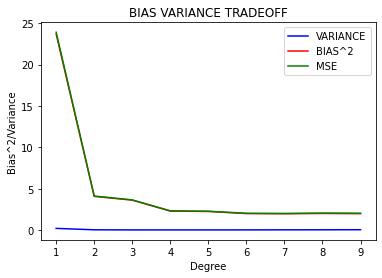

In [15]:
# Plot the bias-variance tradeoff
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()
#bias^2 doesn't appear because of the scaling -variance is close to 0 so mse will be close to bias^2 and therefor plotted above it-